first right percent is:  0.5714285714285714
right percent is:  0.8636363636363636
first right percent is:  0.8636363636363636
right percent is:  0.8636363636363636


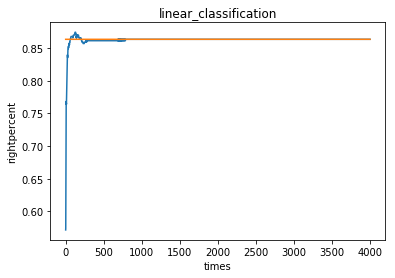

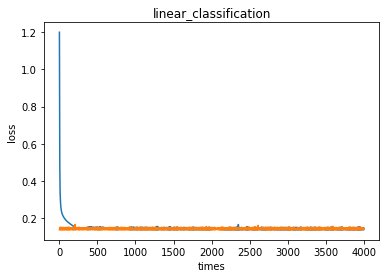

In [30]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *
import numpy as np
import pylab as pl
mem = Memory("./mycache")
# 导入数据
@mem.cache
def get_data():
    data = load_svmlight_file("/home/picher/workSpace/ML_exp/australian_scale.txt",14,dtype=float64)
    return data[0], data[1]
# 处理数据格式等
w = ini_para(15)
x, y = get_data()
x = x.toarray()
b = np.ones((690,1))
x = np.c_[x,b]
y = np.transpose([y])
w = w.transpose(1,0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
# 数组用于存放训练集和测试集的训练结果，用于画图
# 次数
compute_times_train = []
compute_times_test = []
# 正确率
right_train = []
right_test = []
# loss
loss_pic_train = []
loss_pic_test = []
# 分类器训练
w_train = linear_classification(x_train,y_train,w,right_train,compute_times_train, loss_pic_train)
# 用训练集训练出来的 w_train 测试
linear_classification(x_train,y_train,w_train,right_test,compute_times_test, loss_pic_test)

# 以下为作图部分
# 图一展示准确率随训练次数的变化
pl.figure(1)
pl.plot(compute_times_train, right_train)# use pylab to plot x and y
pl.plot(compute_times_test, right_test)# use pylab to plot x and y
pl.title('linear_classification')# give plot a title
pl.xlabel('times')# make axis labels
pl.ylabel('rightpercent')

# 图二展示 hinge_loss 随训练次数的变化
pl.figure(2)
pl.plot(compute_times_train, loss_pic_train)# use pylab to plot x and y
pl.plot(compute_times_train, loss_pic_test)# use pylab to plot x and y
pl.title('linear_classification')# give plot a title
pl.xlabel('times')# make axis labels
pl.ylabel('loss')
pl.show()# show the plot on the screen

In [17]:
def ini_para(feature_num):
    prng = random.seed(1)
    # 全 0
    #w = zeros((1,feature_num), dtype = float)
    # 随机
    w1 = np.random.random([1,feature_num])
    # 卡方分布
    w2 = np.random.chisquare(1,size=(1,feature_num))
    # 正态分布
    w3 = np.random.randn(1,feature_num)
    # 打印参数，测试用
    #print (w)
    #print(w1.dtype)
    return w2

In [4]:
def hinge_loss(y1,y,size):
    one_array = np.ones((size,1))
    minus = one_array - y*y1
    zero = np.zeros((size,1))
    out = np.maximum(minus, zero)
    result = out.sum()/(2*size)
    return result

In [5]:
def model(w,x):
    result = np.dot(x,w)
    return result

In [29]:
def linear_classification(x,y,w,RIGHT,compute_times,loss_pic):        
    eta = 0.0009
    loss = 100
    times = 0
    size = x.shape[0]
    right = 0
    while times <4000:
        y1 = model(w,x)
        right = right_percent(y,y1)
        RIGHT.append(right)
        loss1 = hinge_loss(y1,y,size)
        loss_pic.append(loss1)
        gw = compute_gw(y1,y,x)
        Dw = w + 0.9*(gw.transpose(1,0))
        w = refresh(w,eta,Dw)
        times = times + 1
        compute_times.append(times)
        if times == 1:
            print('first right percent is: ', right)
    print('right percent is: ', right)
    return w

In [7]:
def model(w,x):
    result = np.dot(x,w)
    return result

In [8]:
def refresh(w_old,eta,G1):
    w = w_old - np.dot(eta,G1)
    return w

In [9]:
def compute_gw(y1,y,x):
    gw = zeros((1,15))
    for i in range(0, len(y1)):
        loss = 1 - y[i]*y1[i]
        if loss >=0:
            gw = gw +(-y[i]*x[i])
    result = np.array(gw)
    return result

In [10]:
def right_percent(y,y1):
    compute = zeros((690,1))
    right = 0
    shape = y.shape[0]
    for i in range(0, len(y1)):
        if y1[i]>=0:
            compute[i]=1
        else:
            compute[i]=-1
    for k in range(0, len(y1)):
        if compute[k]==y[k]:
            right = right+1
    result = right/shape
    return result